continue from  of session 4

session 1 -> intro to aws sagemaker : https://www.youtube.com/watch?v=CnNo90dL6Lo&embeds_referring_euri=https%3A%2F%2Flearnwith.campusx.in%2F&
embeds_referring_origin=https%3A%2F%2Flearnwith.campusx.in&source_ve_path=MzY4NDIsMjM4NTE

session 2 -> github & data cleaning: https://www.youtube.com/watch?v=5L8TaXXGFsY

session 3 -> eda : https://www.youtube.com/watch?v=odZCToOTvSQ&t=1s

eda contd:  https://www.youtube.com/watch?v=aLYt0ShVANE&t=1s

feature engineering: https://www.youtube.com/watch?v=5Yg58Rlu9po

model training & deployment: https://www.youtube.com/watch?v=9sm7qHInUoA

### 1. Import Libraries

In [1]:
import eda_helper_functions

In [2]:
import os
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.ensemble import IsolationForest

### 2. Read the training data

In [4]:
file_path = r"C:\Users\Abhinay\Desktop\flight-prediction-sageMaker\data\train.csv"
train = pd.read_csv(file_path)

In [5]:
train.shape

(640, 10)

In [6]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-04-09,Delhi,Cochin,05:55:00,19:15:00,2240,2,No info,7711
1,Air India,2019-06-03,Delhi,Cochin,07:10:00,07:40:00,1470,2,No info,12698
2,Air India,2019-05-15,Kolkata,Banglore,16:45:00,21:05:00,1700,1,No info,7452
3,Vistara,2019-06-15,Chennai,Kolkata,07:05:00,09:20:00,135,0,No info,3687
4,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2,No info,9483


In [7]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
duration            int64
total_stops         int64
additional_info    object
price               int64
dtype: object

now change the dtypes of 'date_of_journey', 'dep_time', 'arrival_time' 

In [8]:
train.date_of_journey

0      2019-04-09
1      2019-06-03
2      2019-05-15
3      2019-06-15
4      2019-04-09
          ...    
635    2019-03-06
636    2019-04-21
637    2019-06-09
638    2019-05-18
639    2019-03-24
Name: date_of_journey, Length: 640, dtype: object

In [9]:
# Keep only those that do NOT match YYYY-MM-DD
train[~train['date_of_journey'].str.match(r'^\d{4}-\d{2}-\d{2}$')]



,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price


all 'dates' are of the correct format

In [10]:
train.dep_time

0      05:55:00
1      07:10:00
2      16:45:00
3      07:05:00
4      23:05:00
         ...   
635    11:30:00
636    02:00:00
637    22:15:00
638    14:20:00
639    13:55:00
Name: dep_time, Length: 640, dtype: object

In [11]:
# This will return True for rows where format is exactly HH:MM:SS
valid_time_format = train['arrival_time'].astype(str).str.match(r'^\d{2}:\d{2}:\d{2}$')

# Show rows with invalid time format
invalid_times = train[~valid_time_format]

print(f"Invalid arrival_time entries:\n{invalid_times[['arrival_time']]}")


Invalid arrival_time entries:
Empty DataFrame
Columns: [arrival_time]
Index: []


In [13]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
duration                    int64
total_stops                 int64
additional_info            object
price                       int64
dtype: object

In [14]:
train.head(n=5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-04-09,Delhi,Cochin,05:55:00,19:15:00,2240,2,No info,7711
1,Air India,2019-06-03,Delhi,Cochin,07:10:00,07:40:00,1470,2,No info,12698
2,Air India,2019-05-15,Kolkata,Banglore,16:45:00,21:05:00,1700,1,No info,7452
3,Vistara,2019-06-15,Chennai,Kolkata,07:05:00,09:20:00,135,0,No info,3687
4,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2,No info,9483


In [15]:
train['dep_time'].apply(type).unique()


array([<class 'datetime.time'>], dtype=object)

### 3. High-level Summary of Data

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    object        
 5   arrival_time     640 non-null    object        
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    int64         
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 50.1+ KB


In [17]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,626.640625,0.804688,9069.054688
std,490.248615,0.641040,4659.946820
min,80.000000,0.000000,1759.000000
25%,170.000000,0.000000,5483.250000
50%,507.500000,1.000000,8206.000000
75%,906.250000,1.000000,12263.750000
max,2245.000000,2.000000,46490.000000


In [18]:
train.describe(include="O")

,airline,source,destination,dep_time,arrival_time,additional_info
count,640,640,640,640,640,640
unique,8,5,5,159,166,4
top,Jet Airways,Delhi,Cochin,17:00:00,04:25:00,No info
freq,214,264,264,17,35,519


we want to make total_stops as categorical than numerical

In [19]:
(
  train
  .assign(total_stops=train["total_stops"].astype(object))
  .describe(include="O")
)

,airline,source,destination,dep_time,arrival_time,total_stops,additional_info
count,640,640,640,640,640,640,640
unique,8,5,5,159,166,3,4
top,Jet Airways,Delhi,Cochin,17:00:00,04:25:00,1,No info
freq,214,264,264,17,35,353,519


In [20]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
duration                    int64
total_stops                 int64
additional_info            object
price                       int64
dtype: object

### 4. High level analysis of missing values in our dataset
  

#### missing values

In [21]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:

[titanic[col].isna().sum() for col in [col for col in titanic.columns if titanic[col].isna().any()]]

[np.int64(177), np.int64(2), np.int64(688), np.int64(2)]

In [23]:
eda_helper_functions.missing_info(train)


,count,percentage
variable,,


In [24]:
eda_helper_functions.missing_info(titanic)

,count,percentage
variable,,
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


Plot missing info

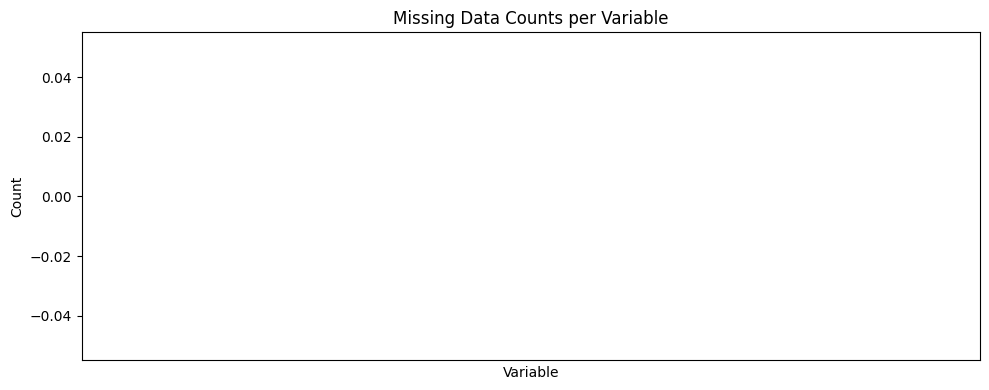

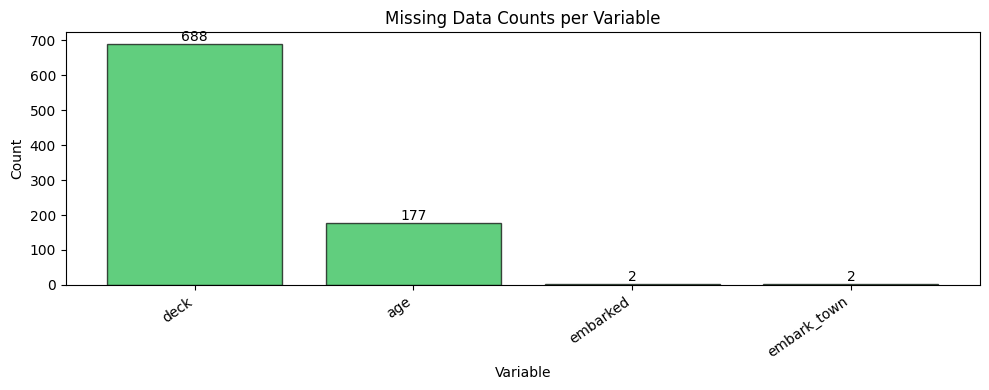

In [25]:
eda_helper_functions.plot_missing_info(train)
eda_helper_functions.plot_missing_info(titanic)


in our training data there r no missing values

### 5. High level analysis of Outliers

we will use IsolationForest , only does on numeric colms

In [26]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
duration                    int64
total_stops                 int64
additional_info            object
price                       int64
dtype: object

In [27]:
[col for col in train.columns if pd.api.types.is_numeric_dtype(train[col])]

['duration', 'total_stops', 'price']

In [28]:
forest = IsolationForest(n_estimators=100, random_state=12)

In [29]:
(   
  train
  .assign(
    outlier = forest.fit_predict(
      train
      .drop(columns='price')
      .select_dtypes(include="number")
    )                                       
  )
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-04-09,Delhi,Cochin,05:55:00,19:15:00,2240,2,No info,7711,-1
1,Air India,2019-06-03,Delhi,Cochin,07:10:00,07:40:00,1470,2,No info,12698,-1
2,Air India,2019-05-15,Kolkata,Banglore,16:45:00,21:05:00,1700,1,No info,7452,-1
3,Vistara,2019-06-15,Chennai,Kolkata,07:05:00,09:20:00,135,0,No info,3687,-1
4,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2,No info,9483,-1
...,...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-06,Delhi,Cochin,11:30:00,19:15:00,465,1,No info,15077,1
636,Indigo,2019-04-21,Delhi,Cochin,02:00:00,07:45:00,345,1,No info,6258,1
637,Indigo,2019-06-09,Kolkata,Banglore,22:15:00,00:50:00,155,0,No info,5224,1
638,Indigo,2019-05-18,Delhi,Cochin,14:20:00,22:30:00,490,1,No info,7640,1


In [30]:
(   
  train
  .assign(
    outlier = forest.fit_predict(
      train
      .drop(columns='price')
      .select_dtypes(include="number")
    )                                       
  )
  .outlier.value_counts()
)

outlier
 1    389
-1    251
Name: count, dtype: int64

In [31]:
(   
  train
  .assign(
    outlier = forest.fit_predict(
      train
      .drop(columns='price')
      .select_dtypes(include="number")
    )                                       
  )
  .query("outlier==-1")
)  # we have 3 numeric colms : duration ,  total_stosp and price 

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-04-09,Delhi,Cochin,05:55:00,19:15:00,2240,2,No info,7711,-1
1,Air India,2019-06-03,Delhi,Cochin,07:10:00,07:40:00,1470,2,No info,12698,-1
2,Air India,2019-05-15,Kolkata,Banglore,16:45:00,21:05:00,1700,1,No info,7452,-1
3,Vistara,2019-06-15,Chennai,Kolkata,07:05:00,09:20:00,135,0,No info,3687,-1
4,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2,No info,9483,-1
...,...,...,...,...,...,...,...,...,...,...,...
618,Jet Airways,2019-06-03,Delhi,Cochin,17:30:00,19:00:00,1530,1,No info,14714,-1
619,Multiple Carriers,2019-03-03,Delhi,Cochin,07:10:00,21:20:00,850,2,In-flight meal not included,8938,-1
621,Air India,2019-05-21,Kolkata,Banglore,14:30:00,23:15:00,525,2,No info,15107,-1
631,Air India,2019-05-18,Delhi,Cochin,06:05:00,09:25:00,1640,1,No info,7480,-1


In [32]:
#for detailed analysis, come back to this
(   
  train
  .assign(
    outlier = forest.fit_predict(
      train
      .drop(columns='price')
      .select_dtypes(include="number")
    )                                       
  )
  .query("outlier==-1")
  .duration
  .describe()
)  # we have 3 numeric colms : duration ,  total_stops and price 

count     251.000000
mean      824.661355
std       656.135036
min        80.000000
25%       150.000000
50%       865.000000
75%      1422.500000
max      2245.000000
Name: duration, dtype: float64

there are 250 rows which r outliers, need to insepect more later 

### 6. Pair Plots

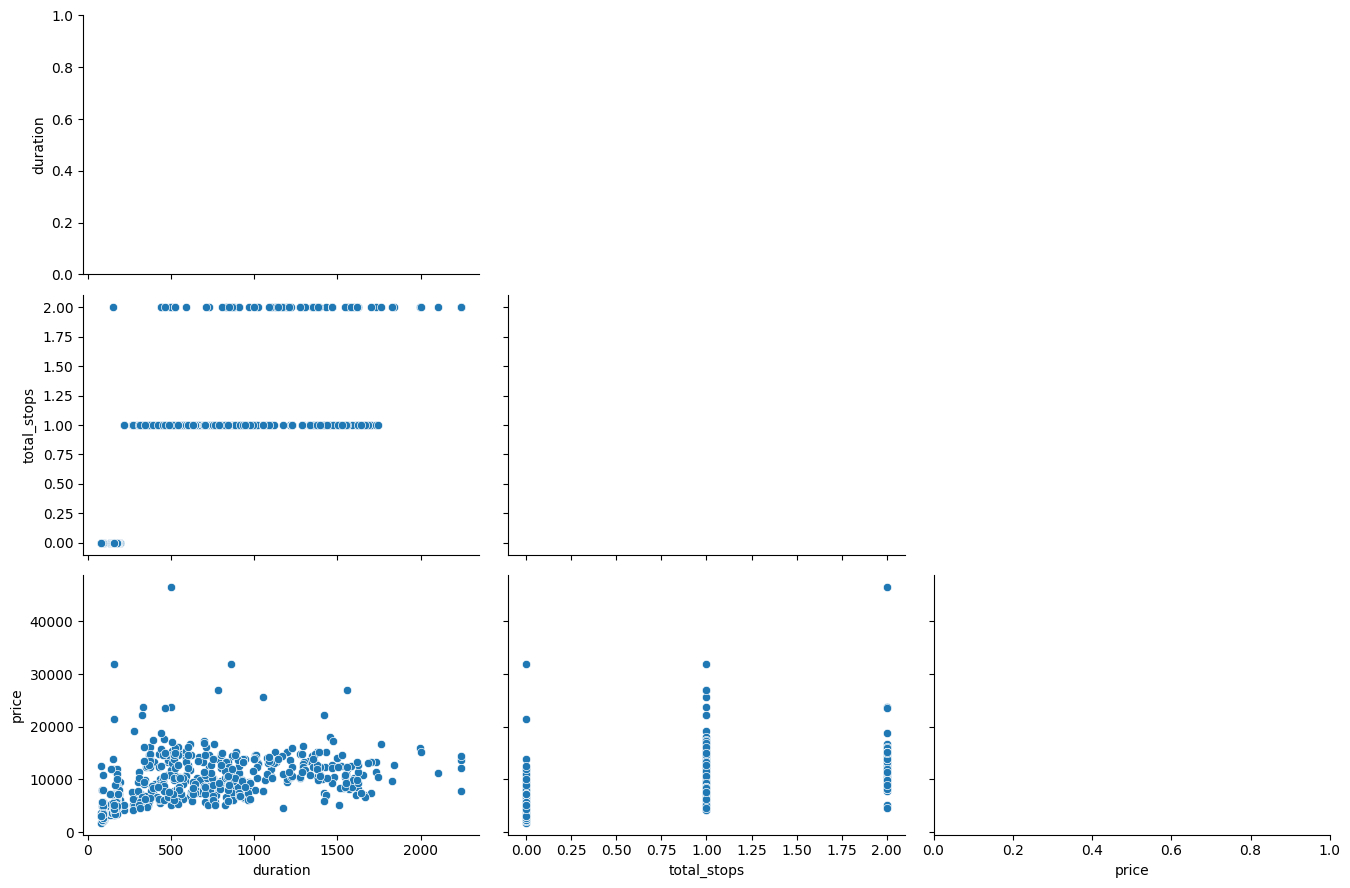

In [33]:
eda_helper_functions.pair_plots(train)

### 7. Correlation Analysis

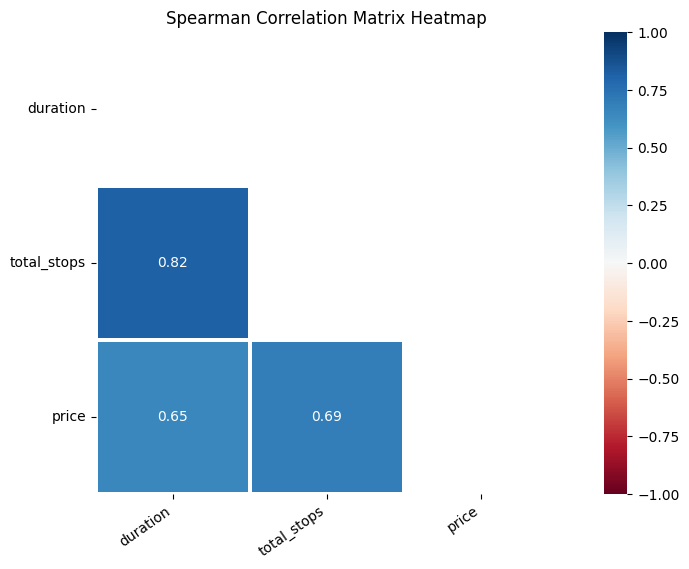

In [34]:
eda_helper_functions.correlation_heatmap(train) # only for numerical features

In [35]:
# eda_helper_functions.cramersV_heatmap(train)

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # Required for chi2_contingency

def cramers_v(data, var1, var2):
    ct = pd.crosstab(data[var1], data[var2])
    r, c = ct.shape
    n = ct.values.sum()
    chi2 = stats.chi2_contingency(ct)[0]
    phi2 = chi2 / n

    # Bias correction
    phi2_corr = max(0, phi2 - ((r - 1) * (c - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    c_corr = c - ((c - 1) ** 2) / (n - 1)

    denom = min(c_corr - 1, r_corr - 1)
    if denom <= 0:
        return np.nan

    v = np.sqrt(phi2_corr / denom)
    return min(v, 1.0)  # Clamp to 1.0 max

def plot_cramers_v_heatmap(df):
    cat_cols = df.select_dtypes(include='object').columns.tolist()

    if len(cat_cols) < 2:
        print("❌ Not enough categorical features for Cramér's V heatmap.")
        return

    matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

    for i, col1 in enumerate(cat_cols):
        for j, col2 in enumerate(cat_cols):
            if i >= j:  # Lower triangle and diagonal
                matrix.loc[col1, col2] = cramers_v(df, col1, col2)
            else:
                matrix.loc[col1, col2] = np.nan

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        matrix,
        annot=True,
        cmap='YlGnBu',
        fmt='.2f',
        mask=np.triu(np.ones(matrix.shape, dtype=bool)),
        square=True,
        cbar_kws={"shrink": 0.75}
    )
    plt.title("Cramér’s V Heatmap (Categorical Features)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


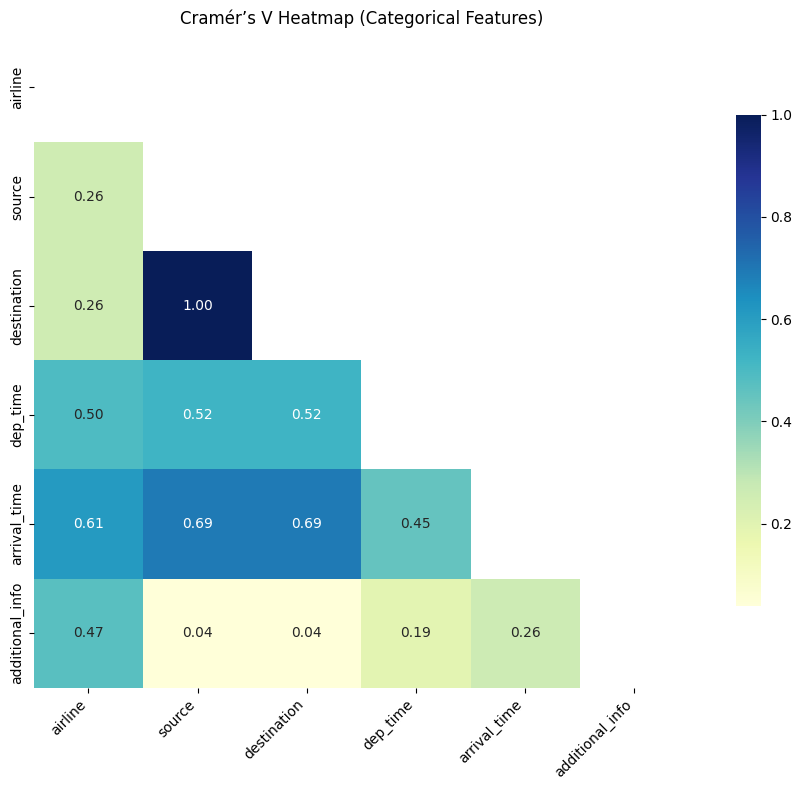

In [37]:
plot_cramers_v_heatmap(train)


### 8. Detailed Analysis


In [38]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

8.1 airline

In [39]:
train.airline

0              Air India
1              Air India
2              Air India
3                Vistara
4            Jet Airways
             ...        
635    Multiple Carriers
636               Indigo
637               Indigo
638               Indigo
639            Air India
Name: airline, Length: 640, dtype: object

In [40]:
eda_helper_functions.cat_summary(train, "airline")

0              Air India
1              Air India
2              Air India
3                Vistara
4            Jet Airways
             ...        
635    Multiple Carriers
636               Indigo
637               Indigo
638               Indigo
639            Air India
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,214


,count,percentage
category,,
Jet Airways,214,0.334375
Indigo,127,0.198437
Air India,117,0.182812
Multiple Carriers,68,0.106250
Spicejet,43,0.067187
Vistara,34,0.053125
Air Asia,27,0.042188
Goair,10,0.015625


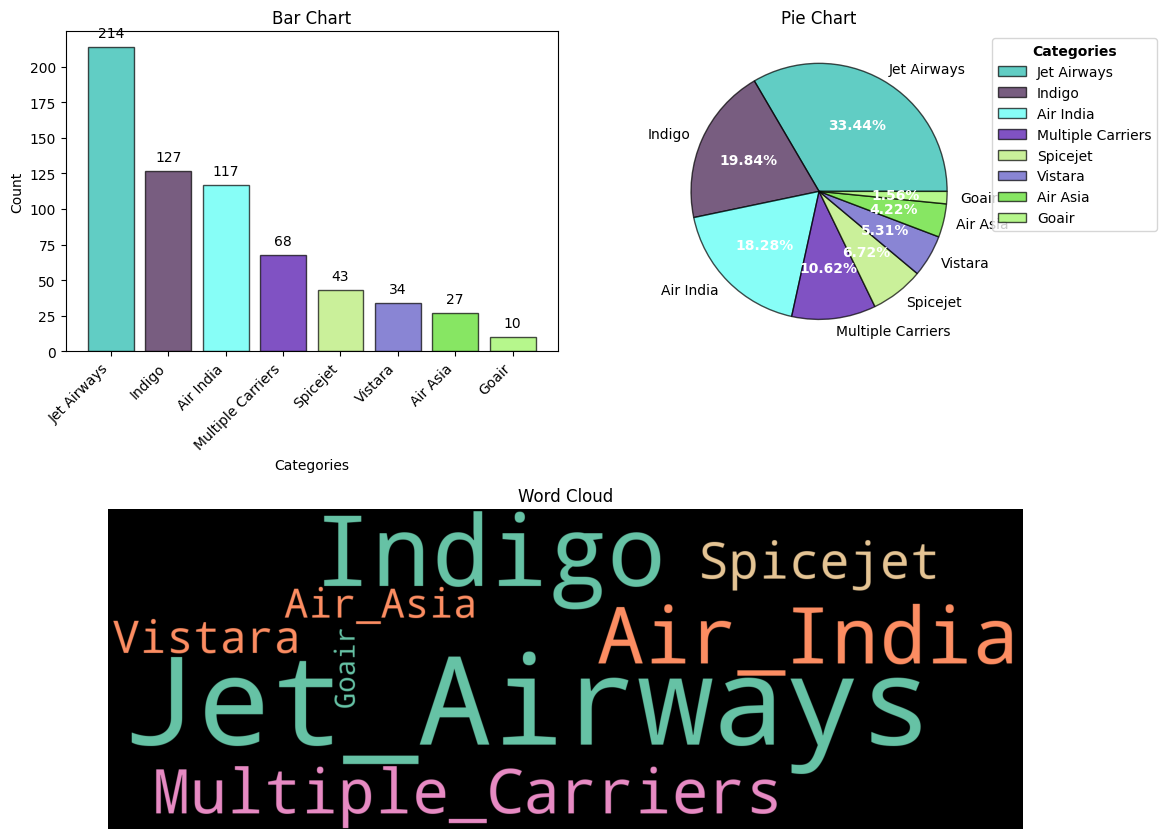

In [41]:
eda_helper_functions.cat_univar_plots(train, "airline")

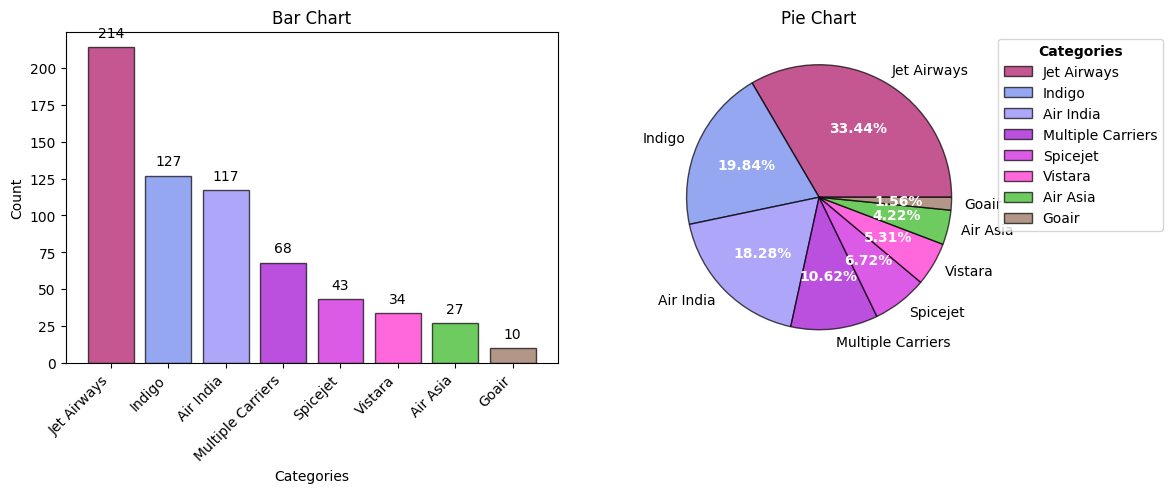

In [42]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False)

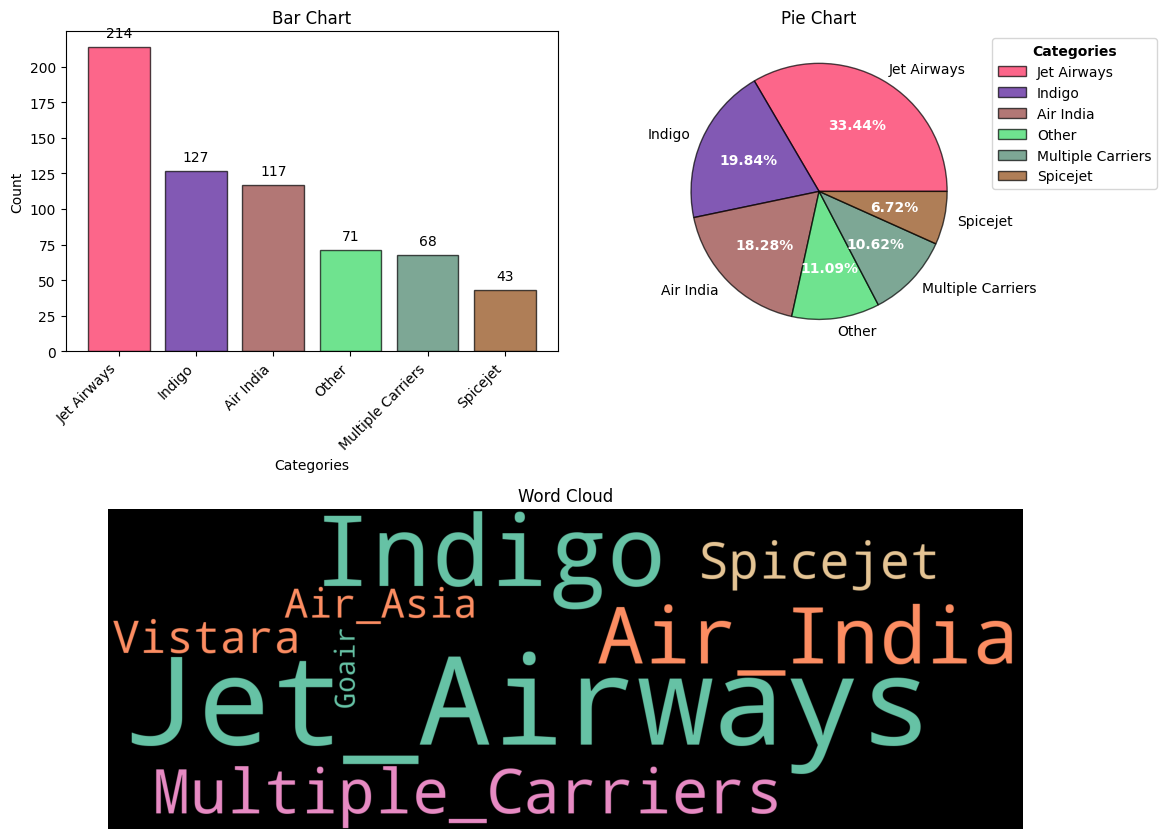

In [43]:
eda_helper_functions.cat_univar_plots(train, "airline", k=5)

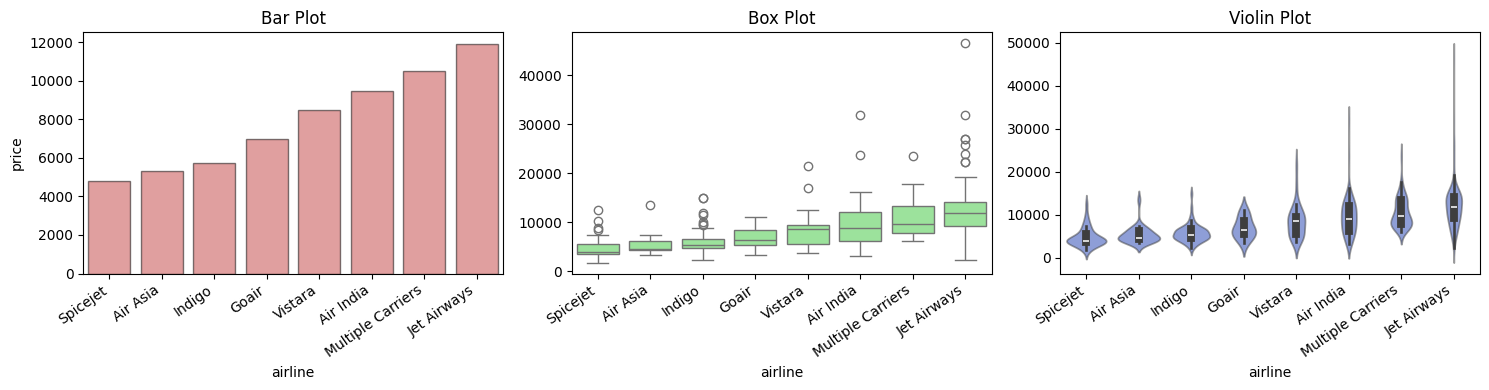

In [44]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "airline")


airline looks like a good predictor for 'price' colm 

eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import f  # Only for p-value of ANOVA
from scipy.special import gammaincc  # For Kruskal-Wallis p-value

def test_num_cat_association(data, num_col, cat_col, alpha=0.05):
    print(f"🔍 Testing association between '{num_col}' (numeric) and '{cat_col}' (categorical)")

    df = data.dropna(subset=[num_col, cat_col])
    groups = [group[num_col].values for _, group in df.groupby(cat_col)]

    # --- ANOVA ---
    k = len(groups)
    n_total = sum(len(g) for g in groups)
    grand_mean = sum([sum(g) for g in groups]) / n_total

    ssb = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups)
    ssw = sum(sum((x - np.mean(g))**2 for x in g) for g in groups)

    df_between = k - 1
    df_within = n_total - k

    msb = ssb / df_between
    msw = ssw / df_within
    f_stat = msb / msw
    p_anova = f.sf(f_stat, df_between, df_within)

    print("\n📊 ANOVA Test (based on means):")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value    : {p_anova:.4f}")
    if p_anova < alpha:
        print(f"  ✅ Reject Null Hypothesis → '{num_col}' and '{cat_col}' are associated (means differ)")
    else:
        print(f"  ❌ Fail to Reject Null → No strong evidence of association based on means")

    # --- Kruskal-Wallis ---
    all_data = np.concatenate(groups)
    n = len(all_data)
    ranks = pd.Series(all_data).rank().values

    start = 0
    rank_sums = []
    for g in groups:
        group_ranks = ranks[start:start + len(g)]
        rank_sums.append(group_ranks.sum())
        start += len(g)

    H = (12 / (n * (n + 1))) * sum((rs**2) / len(g) for rs, g in zip(rank_sums, groups)) - 3 * (n + 1)
    df_kruskal = k - 1
    p_kruskal = 1 - gammaincc(df_kruskal / 2, H / 2)

    print("\n📊 Kruskal-Wallis Test (based on medians):")
    print(f"  H-statistic: {H:.4f}")
    print(f"  p-value    : {p_kruskal:.4f}")
    if p_kruskal < alpha:
        print(f"  ✅ Reject Null Hypothesis → '{num_col}' and '{cat_col}' are associated (medians differ)")
    else:
        print(f"  ❌ Fail to Reject Null → No strong evidence of association based on medians")

# ✅ Example usage:
# test_num_cat_association(train, "price", "airline")


In [46]:
test_num_cat_association(train, "price", "airline")

🔍 Testing association between 'price' (numeric) and 'airline' (categorical)

📊 ANOVA Test (based on means):
  F-statistic: 43.7402
  p-value    : 0.0000
  ✅ Reject Null Hypothesis → 'price' and 'airline' are associated (means differ)

📊 Kruskal-Wallis Test (based on medians):
  H-statistic: 273.2654
  p-value    : 1.0000
  ❌ Fail to Reject Null → No strong evidence of association based on medians


In [47]:
(
  train.assign(log_price=np.log1p(train["price"]))
       .pipe(test_num_cat_association, "log_price", "airline")
)


🔍 Testing association between 'log_price' (numeric) and 'airline' (categorical)

📊 ANOVA Test (based on means):
  F-statistic: 62.7956
  p-value    : 0.0000
  ✅ Reject Null Hypothesis → 'log_price' and 'airline' are associated (means differ)

📊 Kruskal-Wallis Test (based on medians):
  H-statistic: 273.2654
  p-value    : 1.0000
  ❌ Fail to Reject Null → No strong evidence of association based on medians


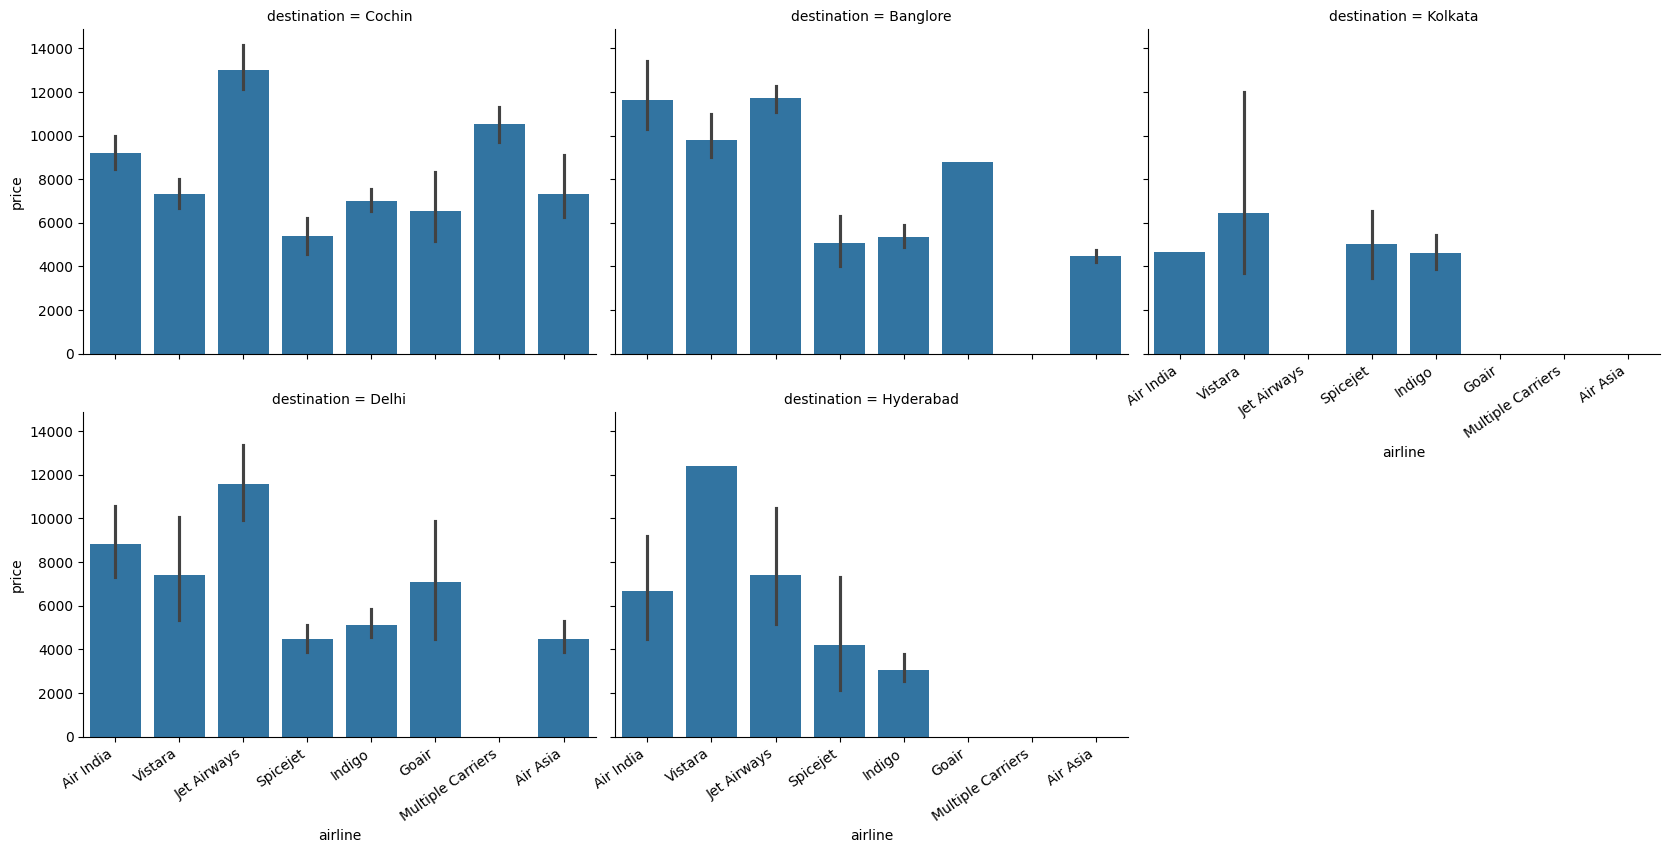

In [48]:
airline_grid = sns.FacetGrid(
  data=train, col="destination", sharey=True, col_wrap=3,
  height=4, aspect=1.4
) 
airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())
  
for ax in airline_grid.axes[2:]:
  eda_helper_functions.rotate_xlabels(ax)   

In [49]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

`date_of_journey`

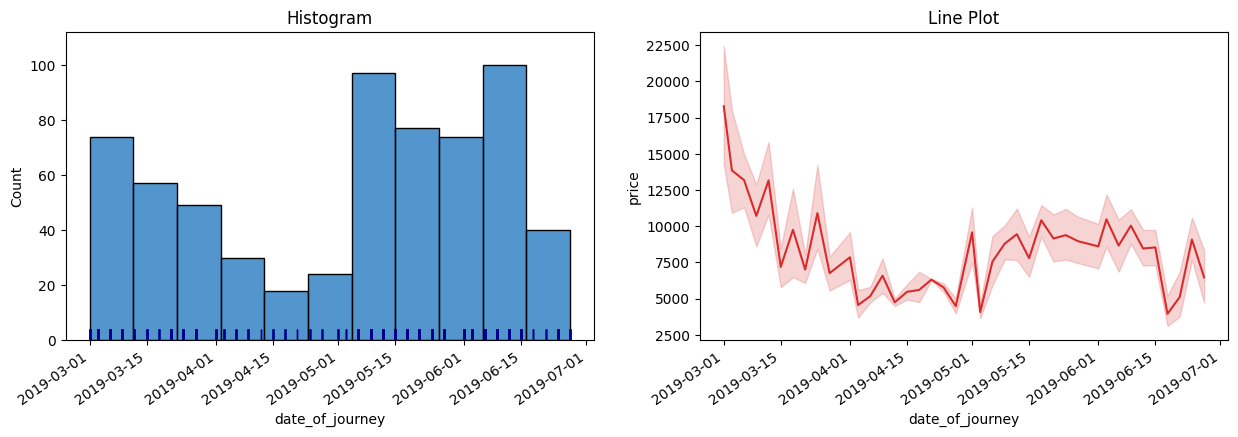

In [50]:
eda_helper_functions.dt_univar_plots(data=train, var='date_of_journey', target='price')

bivariate analysis of `date_of_journey`

In [51]:
(
  train
  .groupby(pd.Grouper(key = "date_of_journey", freq="M"))
  .price.mean()
  .to_frame()
)

,price
date_of_journey,
2019-03-31,10959.832335
2019-04-30,5855.657534
2019-05-31,8899.846154
2019-06-30,8829.541667


In [52]:
(
  train
  .groupby(pd.Grouper(key = "date_of_journey", freq="M"))
  .price.mean()
  .to_frame()
  .set_axis(["March", "April", "May", "June"], axis=0)
  .rename_axis(index="month")
)

,price
month,
March,10959.832335
April,5855.657534
May,8899.846154
June,8829.541667


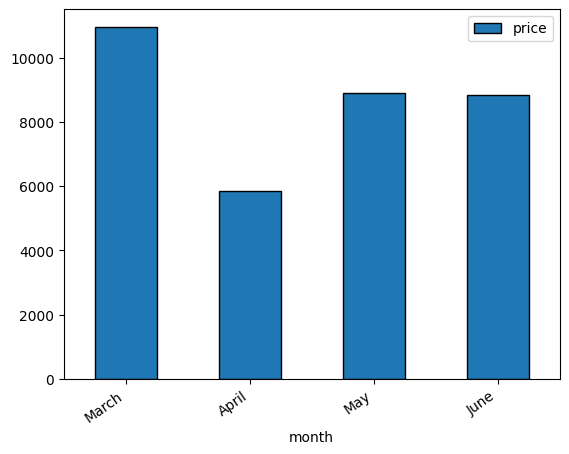

In [53]:
(
  train
  .groupby(pd.Grouper(key = "date_of_journey", freq="M"))
  .price.mean()
  .to_frame()
  .set_axis(["March", "April", "May", "June"], axis=0)
  .rename_axis(index="month")
  .plot(
    kind='bar', edgecolor='black'
  )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

`date_of_journey` looks like a good predictor for price 

multi-variate analysis of `date_of_journey`

In [60]:
(
  train
  .groupby([pd.Grouper(key="date_of_journey", freq="M"),"source"])
  .price.mean()
  .to_frame()
 
)

price
date_of_journey source                
2019-03-31      Banglore  12172.359375
                Chennai    5746.857143
                Delhi     11256.017857
                Kolkata    9888.391304
                Mumbai     9015.470588
2019-04-30      Banglore   4984.724138
                Delhi      6404.545455
                Kolkata    6742.736842
                Mumbai     4631.333333
2019-05-31      Banglore   4629.000000
                Chennai    5167.857143
                Delhi      9841.906667
                Kolkata   10135.666667
                Mumbai     4462.000000
2019-06-30      Banglore   5526.766667
                Chennai    3999.285714
                Delhi     10426.963964
                Kolkata    9763.903226
                Mumbai     3184.615385

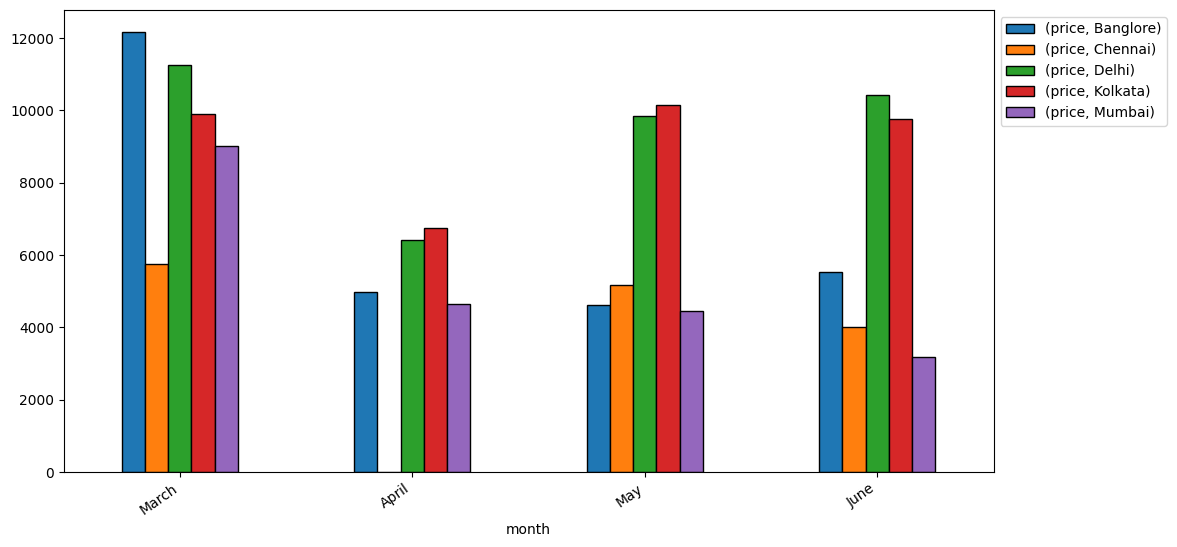

In [65]:
(
  train
  .groupby([pd.Grouper(key="date_of_journey", freq="M"),"source"])
  .price.mean()
  .to_frame()
  .unstack() # move the 1 column i.e source as many colms
  .set_axis(["March", "April", "May", "June"], axis=0)
  .rename_axis(index="month")
  .plot(
    kind="bar", edgecolor="black"
    , figsize=(12,6)
  )
)
ax = plt.gca()
ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)
eda_helper_functions.rotate_xlabels(ax)

`date_of_jounrey` looks like a good feature to include

In [66]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [67]:
train.dep_time

0      05:55:00
1      07:10:00
2      16:45:00
3      07:05:00
4      23:05:00
         ...   
635    11:30:00
636    02:00:00
637    22:15:00
638    14:20:00
639    13:55:00
Name: dep_time, Length: 640, dtype: object

In [74]:
train["dep_time"] = pd.to_datetime(train["dep_time"], format="%H:%M:%S")


In [75]:
train.dep_time

0     1900-01-01 05:55:00
1     1900-01-01 07:10:00
2     1900-01-01 16:45:00
3     1900-01-01 07:05:00
4     1900-01-01 23:05:00
              ...        
635   1900-01-01 11:30:00
636   1900-01-01 02:00:00
637   1900-01-01 22:15:00
638   1900-01-01 14:20:00
639   1900-01-01 13:55:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

In [81]:
( 
  train
  .dep_time
  .dt.hour
  .pipe(lambda ser: pd.Series(np.select([ser.between(4,12,inclusive="left"),
                               ser.between(12,16, inclusive="left"),
                               ser.between(16,20, inclusive="left")
                               
                              ],
                              ["morning","afternoon", "evening"],
                              default="night"))
  )
) #not used apply as apply does value by value , while numpy does vecotor oeprations

0        morning
1        morning
2        evening
3        morning
4          night
         ...    
635      morning
636        night
637        night
638    afternoon
639    afternoon
Length: 640, dtype: object

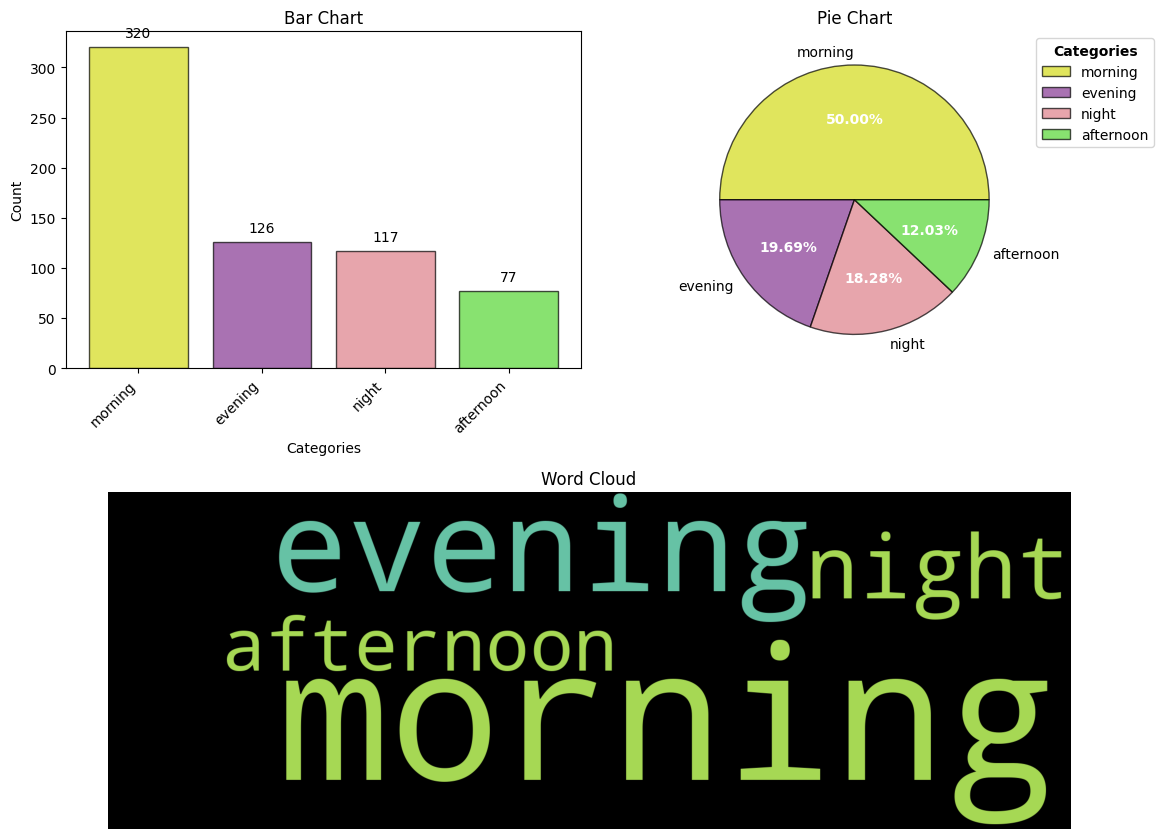

In [85]:
(   
  train
  .assign(
    dep_time = lambda df_: (
      np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                df_.dep_time.dt.hour.between(12,16, inclusive="left"),
                df_.dep_time.dt.hour.between(16,20, inclusive="left")],
                ["morning","afternoon", "evening"],
                default="night")
    )
  ) 
  .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)

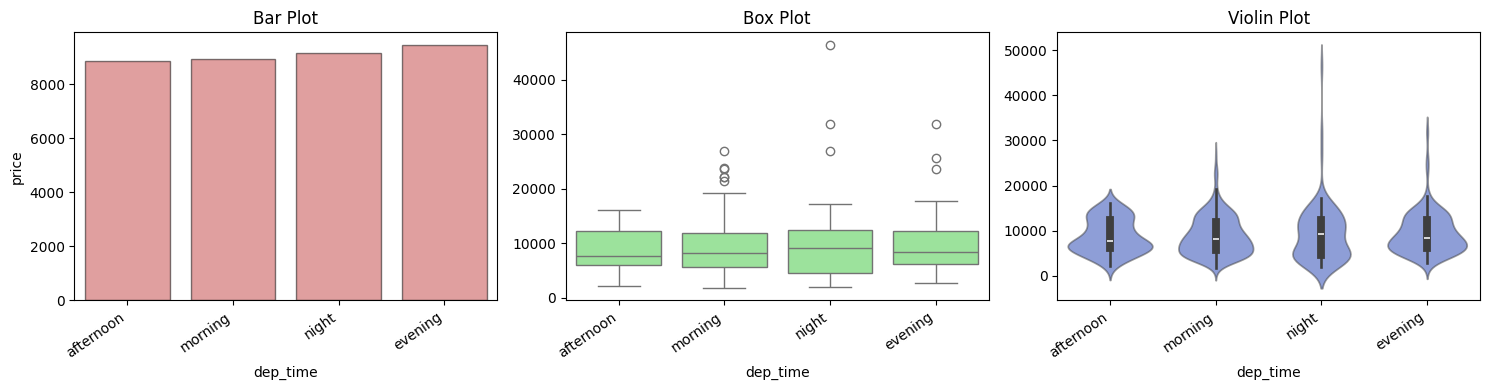

In [87]:
(   
  train
  .assign(
    dep_time = lambda df_: (
      np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                df_.dep_time.dt.hour.between(12,16, inclusive="left"),
                df_.dep_time.dt.hour.between(16,20, inclusive="left")],
                ["morning","afternoon", "evening"],
                default="night")
    )
  ) 
  .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

`duration`

In [90]:
train.duration

0      2240
1      1470
2      1700
3       135
4      1195
       ... 
635     465
636     345
637     155
638     490
639    2000
Name: duration, Length: 640, dtype: int64

In [92]:
eda_helper_functions.num_summary(train, "duration")

0      2240
1      1470
2      1700
3       135
4      1195
       ... 
635     465
636     345
637     155
638     490
639    2000
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,150.00
25,170.00
50,507.50
75,906.25
90,1420.00
95,1580.50
99,1934.55


,value
mean,626.640625
trimmed mean (5%),592.829861
trimmed mean (10%),564.521484
median,507.500000


,value
var,240343.704763
std,490.248615
IQR,736.250000
mad,337.500000
coef_variance,0.782344


,value
skewness,0.915587
kurtosis,0.041001


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 6.5769928761451055e-21
Test Statistic       : 0.8904824071402764
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.020069963281003
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


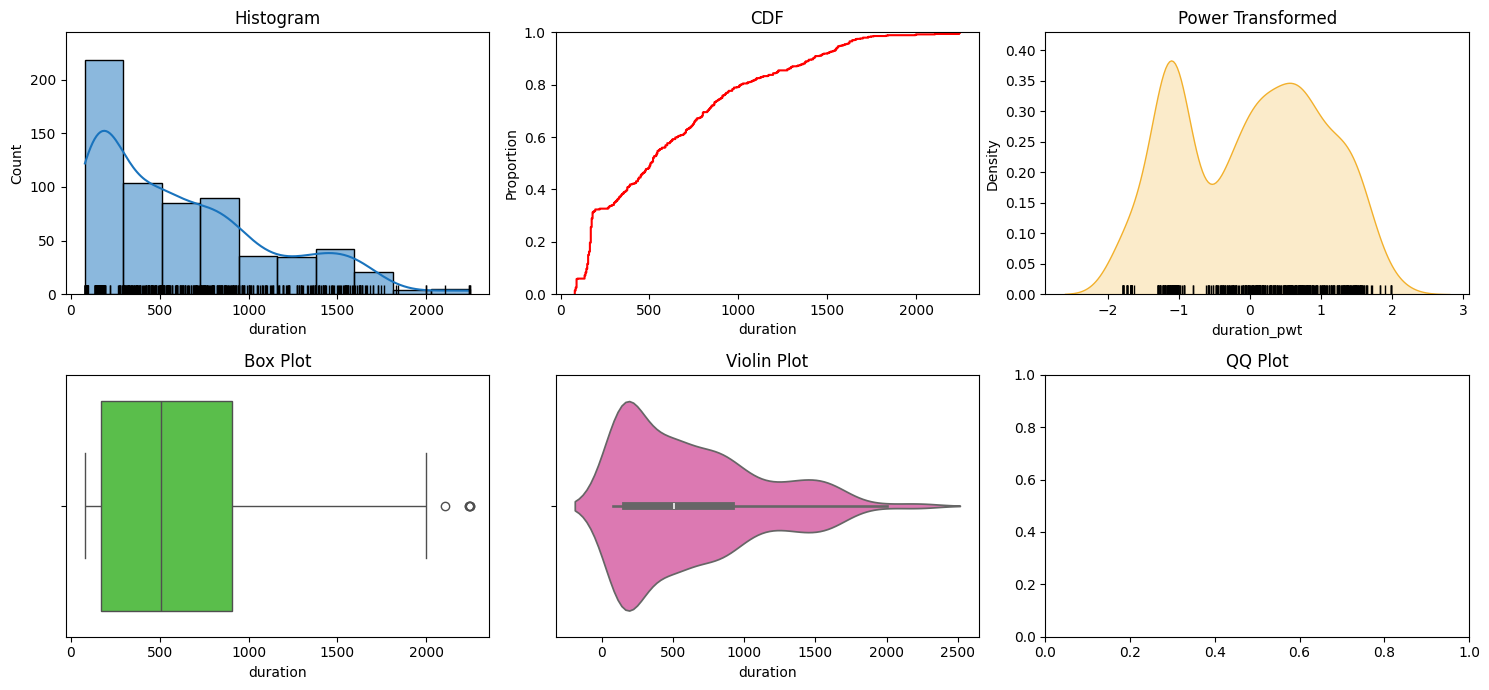

In [93]:
eda_helper_functions.num_univar_plots(train, "duration")

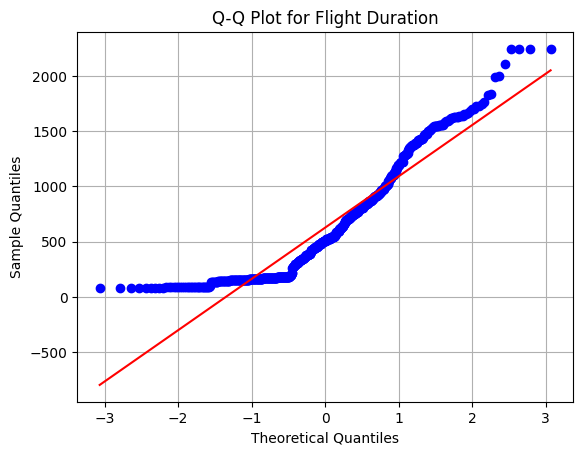

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your DataFrame is named 'train' and the column is 'duration'
duration = train['duration'].dropna()

# Generate the Q-Q plot
plt.title("Q-Q Plot for Flight Duration")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()


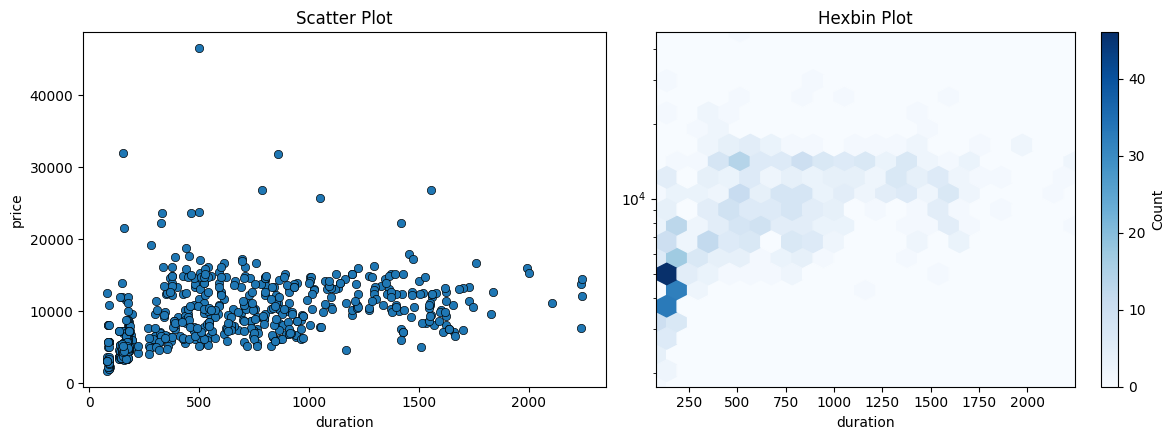

In [96]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [98]:
eda_helper_functions.num_cat_hyp_testing(train,"duration", "price")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 6.213245540359592
- p-value              : 4.0558606071035106e-46
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 602.9803761979476
- p-value              : 1.834452975662455e-11
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are associated to each other


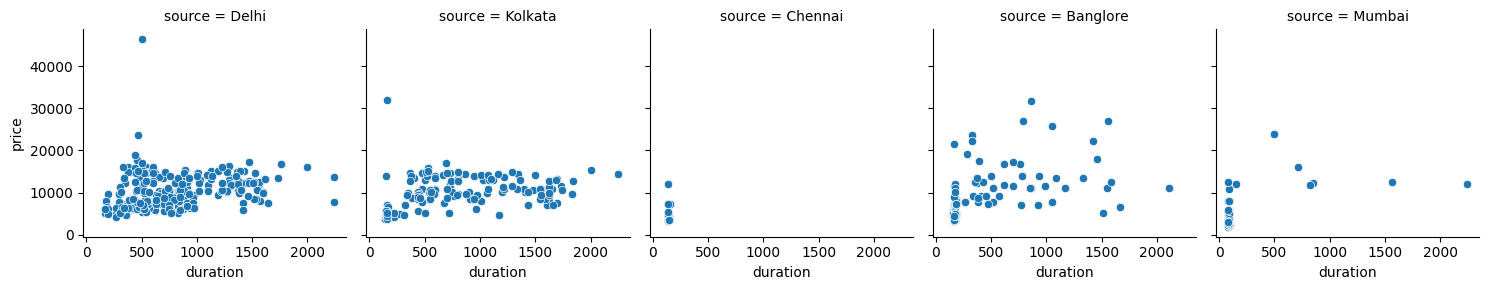

In [100]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

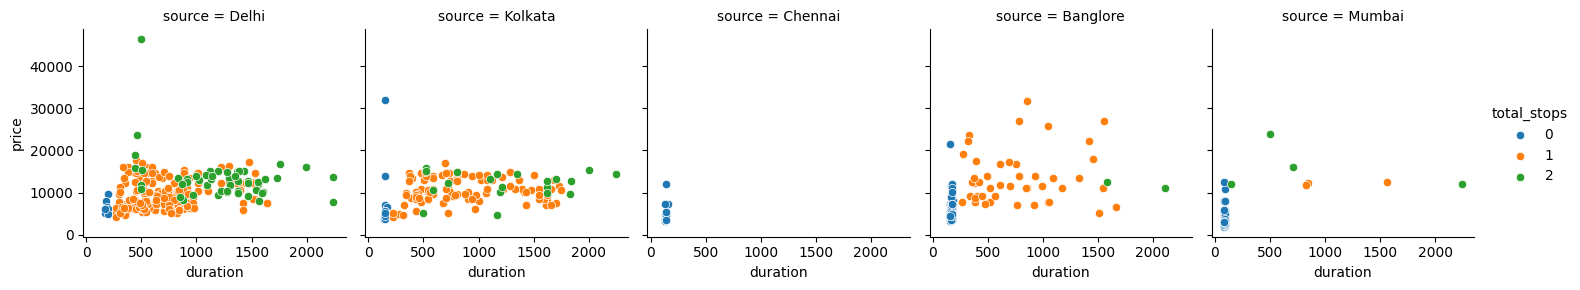

In [101]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

Automated eda 

In [108]:
(
  train
  .loc[:, 'duration']
  .quantile([0.25,0.75])
  .values
)

array([170.  , 906.25])

In [111]:
import dtale

d = dtale.show(train)
d.open_browser()  # 👈 this opens the report in your default web browser
